# Lab-2.1: Assignment
`Gathering text data with an API`

**IMPORTANT:** The lab shown here (on the website) is just an HTML version, included for reference. To download the assignment, please navigate to the Labs tab in the Share-point dropdown menu in the website’s navigation bar. The relevant assignment can be determined from the folder’s name, click on the three dots & select download to get the assignment.

**NOTE**: It is recommended that you complete this `.ipynb` file in VS-code. 

`Submission:`

* Export the completed assignment to HTML or PDF (preferably with Quarto) and upload it to Canvas.
* The final uploaded version should NOT have any code-errors present
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Assignment-1: 

* Read over the `News-API`, `Wikipedia API`, and `Google Scholar` API sections in the lab-demonstration section, if you have not done so already. 
  * [https://jfh.georgetown.domains/dsan5000/](https://jfh.georgetown.domains/dsan5000/)
* Get an API key for the `News-API`: [see following link](https://newsapi.org/docs/get-started)
* **Submission**: Insert your API key below 

In [ ]:
API_KEY='e5fb283476a34988a2f2358c58a08d0e'

## Assignment-2: 

* Use the provided `News-API` code as a starting point 
* Select `THREE` random topics (e.g. Georgetown, Cats, Clouds) but choose whatever you like 
* Query the API to pull text data and store the results in three different dictionaries 
* Extract the `title` and `description` text and store for later processing (up to you how you do this)
* Clean the text as needed 

In [ ]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Lambda handler function for API calls.
def lambdaHandler(topic):
    baseURL = "https://newsapi.org/v2/everything?"
    total_requests=2
    verbose=True
    TOPIC = topic
    URLpost = {'apiKey': API_KEY,
                'q': '+'+TOPIC,
                'sortBy': 'relevancy',
                'totalRequests': 1}

    # print(URLpost)

    #GET DATA FROM API
    response = requests.get(baseURL, URLpost) #request data from the server
    print(response.url)
    # print(response.url);  
    response = response.json()

    #print(json.dumps(response, indent=2))

    from datetime import datetime
    timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")

    # SAVE TO FILE 
    with open(TOPIC + '-newapi-raw-data.json', 'w') as outfile:
        json.dump(response, outfile, indent=4)
    return response

In [ ]:
# Function to clean up strings
def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

In [ ]:
# Function to clean up data before conversion
def cleaner(response):
    article_list=response['articles']   #list of dictionaries for each article
    article_keys=article_list[0].keys()
    total_requests=2
    verbose=True
    print("AVAILABLE KEYS:")
    print(article_keys)
    index=0
    cleaned_data=[];  
    for article in article_list:
        tmp=[]
        if(verbose):
            print("#------------------------------------------")
            print("#",index)
            print("#------------------------------------------")

        for key in article_keys:
            #if(verbose):
                #print("----------------")
                #print(key)
                #print(article[key])
                #print("----------------")

            #if(key=='source'):
                #src=string_cleaner(article[key]['name'])
                #tmp.append(src) 

            #if(key=='author'):
                #author=string_cleaner(article[key])
                #ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
                #if(src in author): 
                    #print(" AUTHOR ERROR:",author);author='NA'
                #tmp.append(author)

            if(key=='title'):
                tmp.append(string_cleaner(article[key]))

            if(key=='description'):
                tmp.append(string_cleaner(article[key]))

            # if(key=='content'):
            #     tmp.append(string_cleaner(article[key]))

            #if(key=='publishedAt'):
                #DEFINE DATA PATERN FOR RE TO CHECK  .* --> wildcard
                #ref = re.compile('.*-.*-.*T.*:.*:.*Z')
                #date=article[key]
                #if(not ref.match(date)):
                    #print(" DATE ERROR:",date); date="NA"
                #tmp.append(date)

        cleaned_data.append(tmp)
        index+=1
    return cleaned_data

In [ ]:
def dataF(cleaned_data, topic):
    #Function to convert a cleaned data frame into a CSV file.
    df = pd.DataFrame(cleaned_data)
    print(df)
    df.to_csv(str(topic) + 'cleaned.csv' ,index_label=['index','title','description'])

In [ ]:
if __name__ == "__main__":
    #Creating dataframes for 3 different topics and storing them in CSV files.
    topic = ["mango", "DOW" , "Watch"]
    for i in topic:
        a = lambdaHandler(topic=i)
        b = cleaner(response=a)
        dataF(b,i)


## Assignment-3: 

* Use the provided `Wikipedia-API` code as a starting point 
* For EACH `THREE` of the random topics, create a word cloud for your cleaned  `title` and `description` text 

In [1]:
import wikipedia


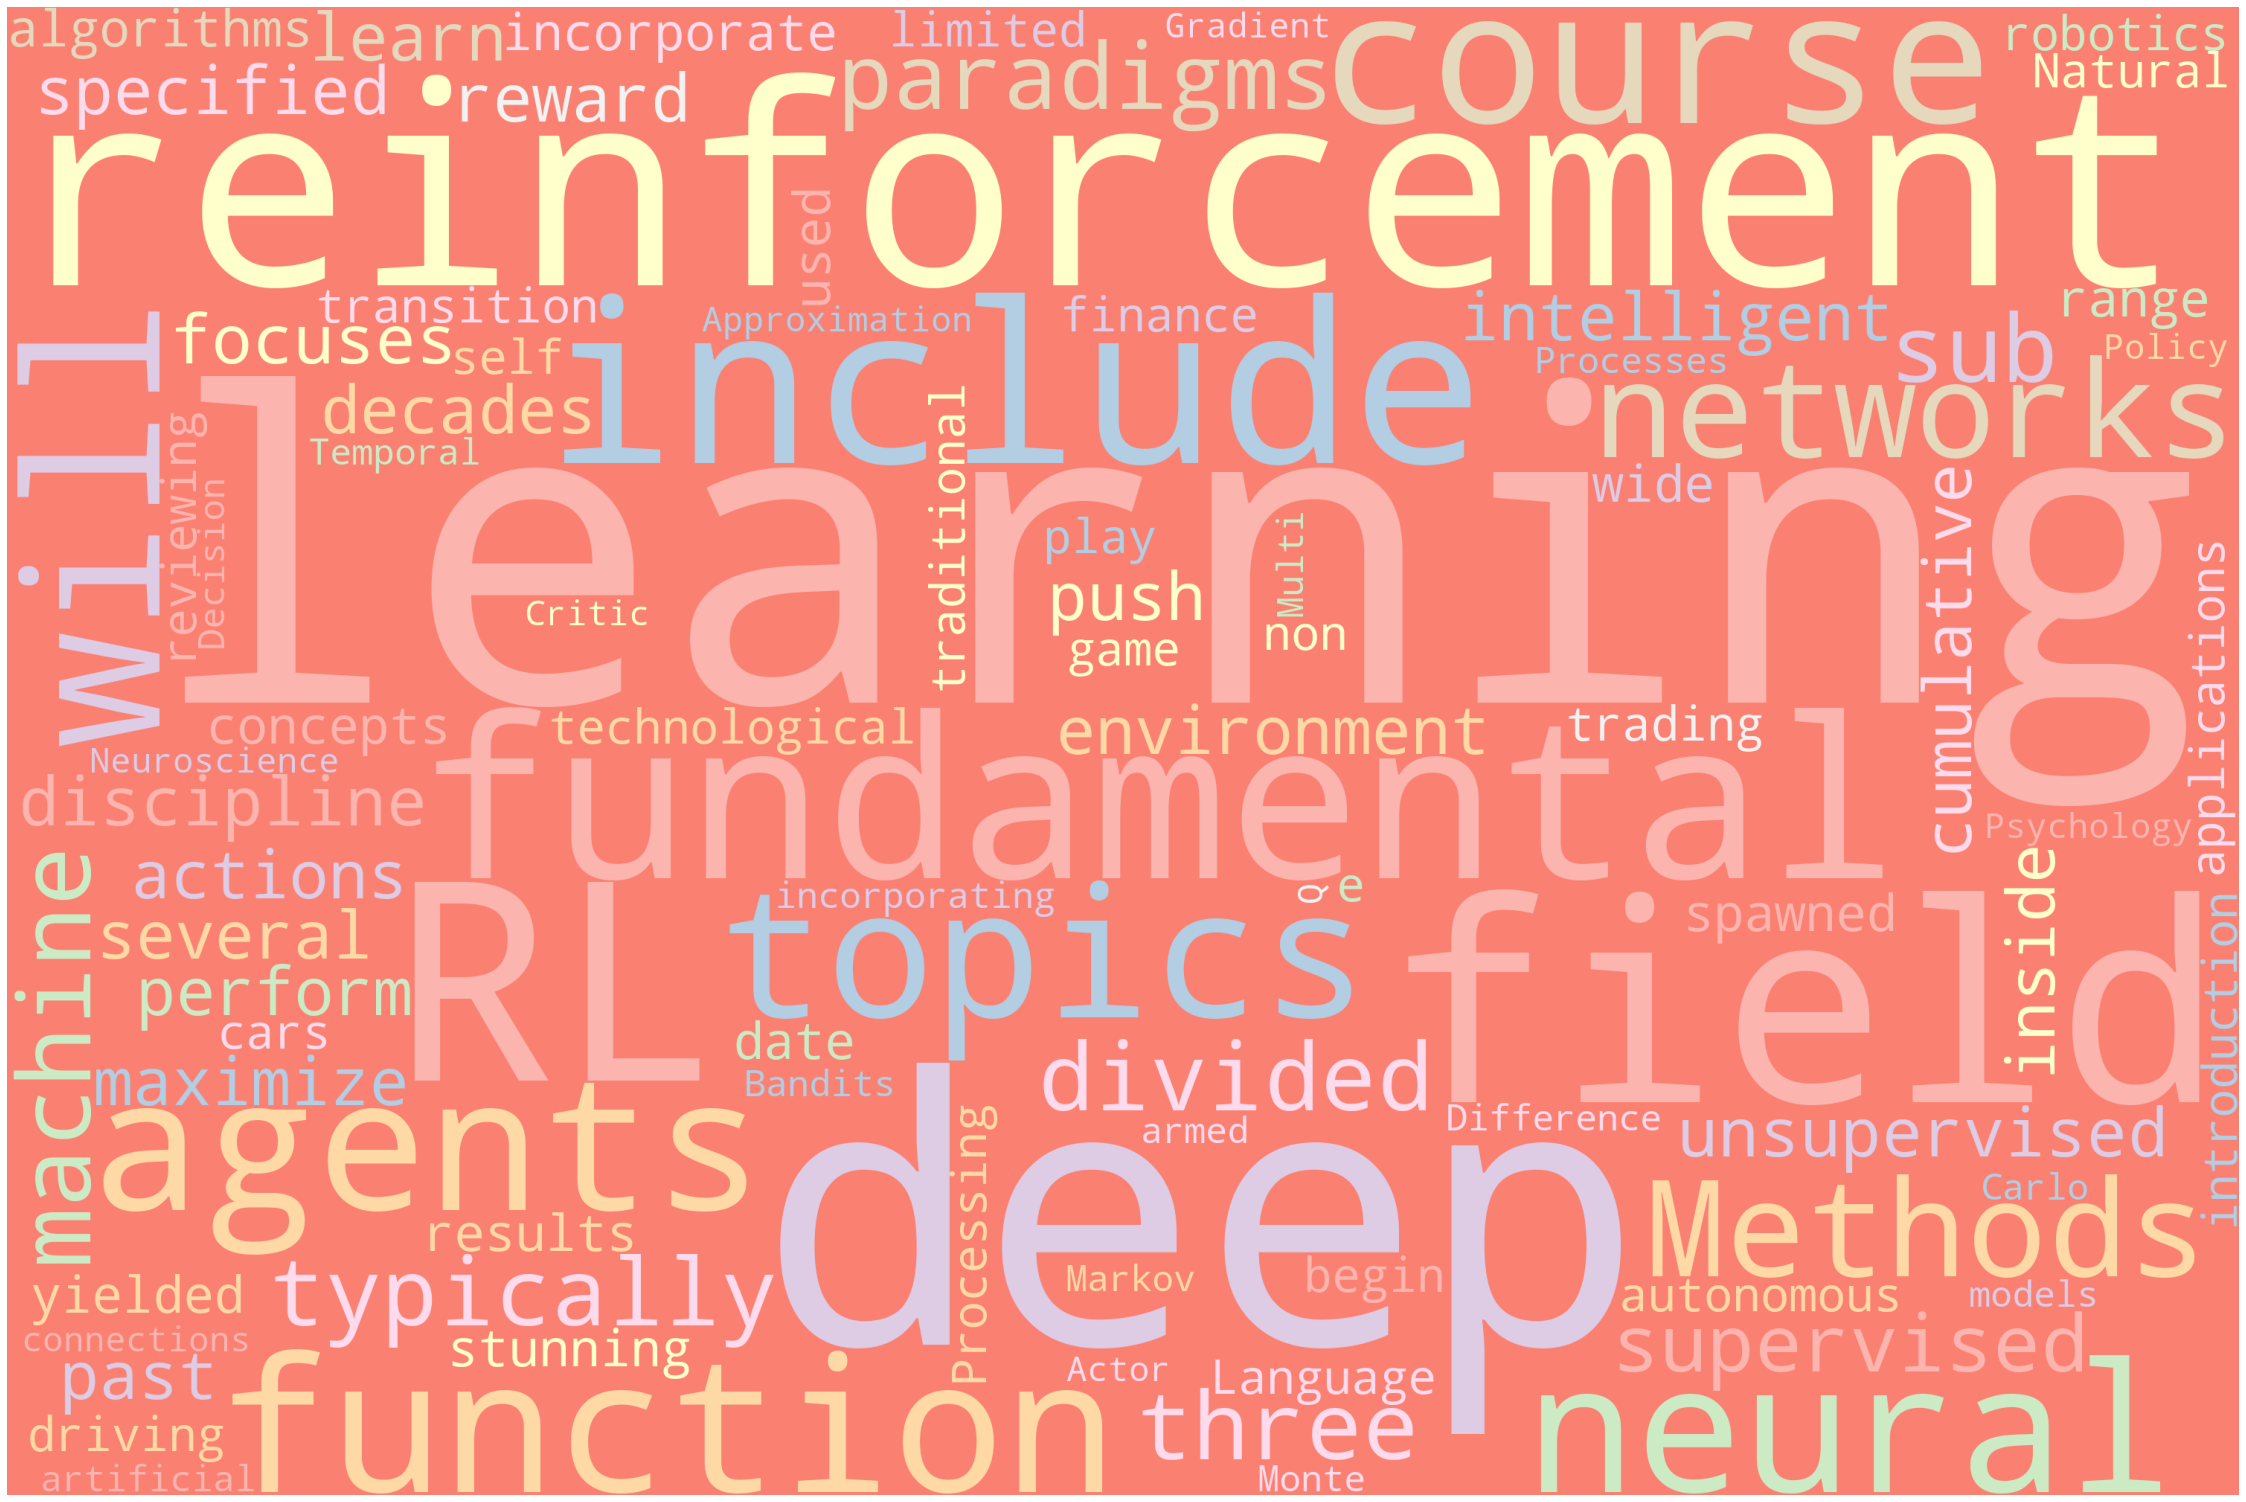

In [2]:
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

text='The field of machine learning is typically divided into three fundamental sub-paradigms. These include supervised learning, unsupervised learning, and reinforcement learning (RL). The discipline of reinforcement learning focuses on how intelligent agents learn to perform actions, inside a specified environment, to maximize  a cumulative reward function. Over the past several decades, there has been a push to incorporate concepts from the field of deep-learning into the agents used in RL algorithms. This has spawned the field of Deep reinforcement learning. To date, the field of deep RL has yielded stunning results in a wide range of technological applications. These include, but are not limited to, self-driving cars, autonomous game play, robotics, trading and finance, and Natural Language Processing. This course will begin with an introduction to the fundamentals of traditional, i.e. non-deep, reinforcement learning. After reviewing fundamental deep learning topics the course will transition to deep RL by incorporating artificial neural networks into the models. Topics include Markov Decision Processes, Multi-armed Bandits, Monte Carlo Methods, Temporal Difference Learning, Function Approximation, Deep Neural Networks, Actor-Critic, Deep Q-Learning, Policy Gradient Methods, and connections to Psychology and to Neuroscience.'

generate_word_cloud(text)

In [9]:
def print_info(wiki_page):
    print("-------------------------")
    print(wiki_page.title)
    print(wiki_page.url)
    print(wiki_page.sections)

    if(verbose):
        print(wiki_page.sections)
        print(wiki_page.categories)
        print(wiki_page.html)
        print(wiki_page.images)
        print(wiki_page.content)
        print(wikipedia.summary(wiki_page.title, auto_suggest=False))
        print(wiki_page.references)
        print(wiki_page.links[0],len(page.links))

#--------------------------
# LOOP OVER COUNTRY AND TOPIC 
#--------------------------

def wordcloudGen(list3, topic_list):
    for i in list3:
    
        text=''
        #--------------------------
        # USER INPUTS
        #--------------------------
        for topic in topic_list:
            topic=topic+' in '+ i 
            print("topic = ",topic)
            max_num_pages=2     #max num pages returned by wiki search
            verbose=False

            #--------------------------
            #SEARCH FOR RELEVANT PAGES 
            #--------------------------
            titles=wikipedia.search(topic,results=max_num_pages)
            print("TITLES=",titles)
            
            #--------------------------
            #LOOP OVER TITLES
            #--------------------------
            num_files=0
            for title in titles:
                try:
                    page = wikipedia.page(title, auto_suggest=False)
                    print_info(page)
                    text = text + page.content
                    num_files+=1
                except:
                    print("SOMETHING WENT WRONG:", title);  

    generate_word_cloud(text)

topic =  System Architecture in computer science
TITLES= ['Computer architecture', 'Outline of computer science']
-------------------------
Computer architecture
https://en.wikipedia.org/wiki/Computer_architecture
[]
-------------------------
Outline of computer science
https://en.wikipedia.org/wiki/Outline_of_computer_science
[]
topic =  Microprocessor in computer science
TITLES= ['Microcomputer', 'Microprocessor']
-------------------------
Microcomputer
https://en.wikipedia.org/wiki/Microcomputer
[]
-------------------------
Microprocessor
https://en.wikipedia.org/wiki/Microprocessor
[]
topic =  Software Engineering in computer science
TITLES= ['Computer science and engineering', 'Software engineering']
-------------------------
Computer science and engineering
https://en.wikipedia.org/wiki/Computer_science_and_engineering
[]
-------------------------
Software engineering
https://en.wikipedia.org/wiki/Software_engineering
[]


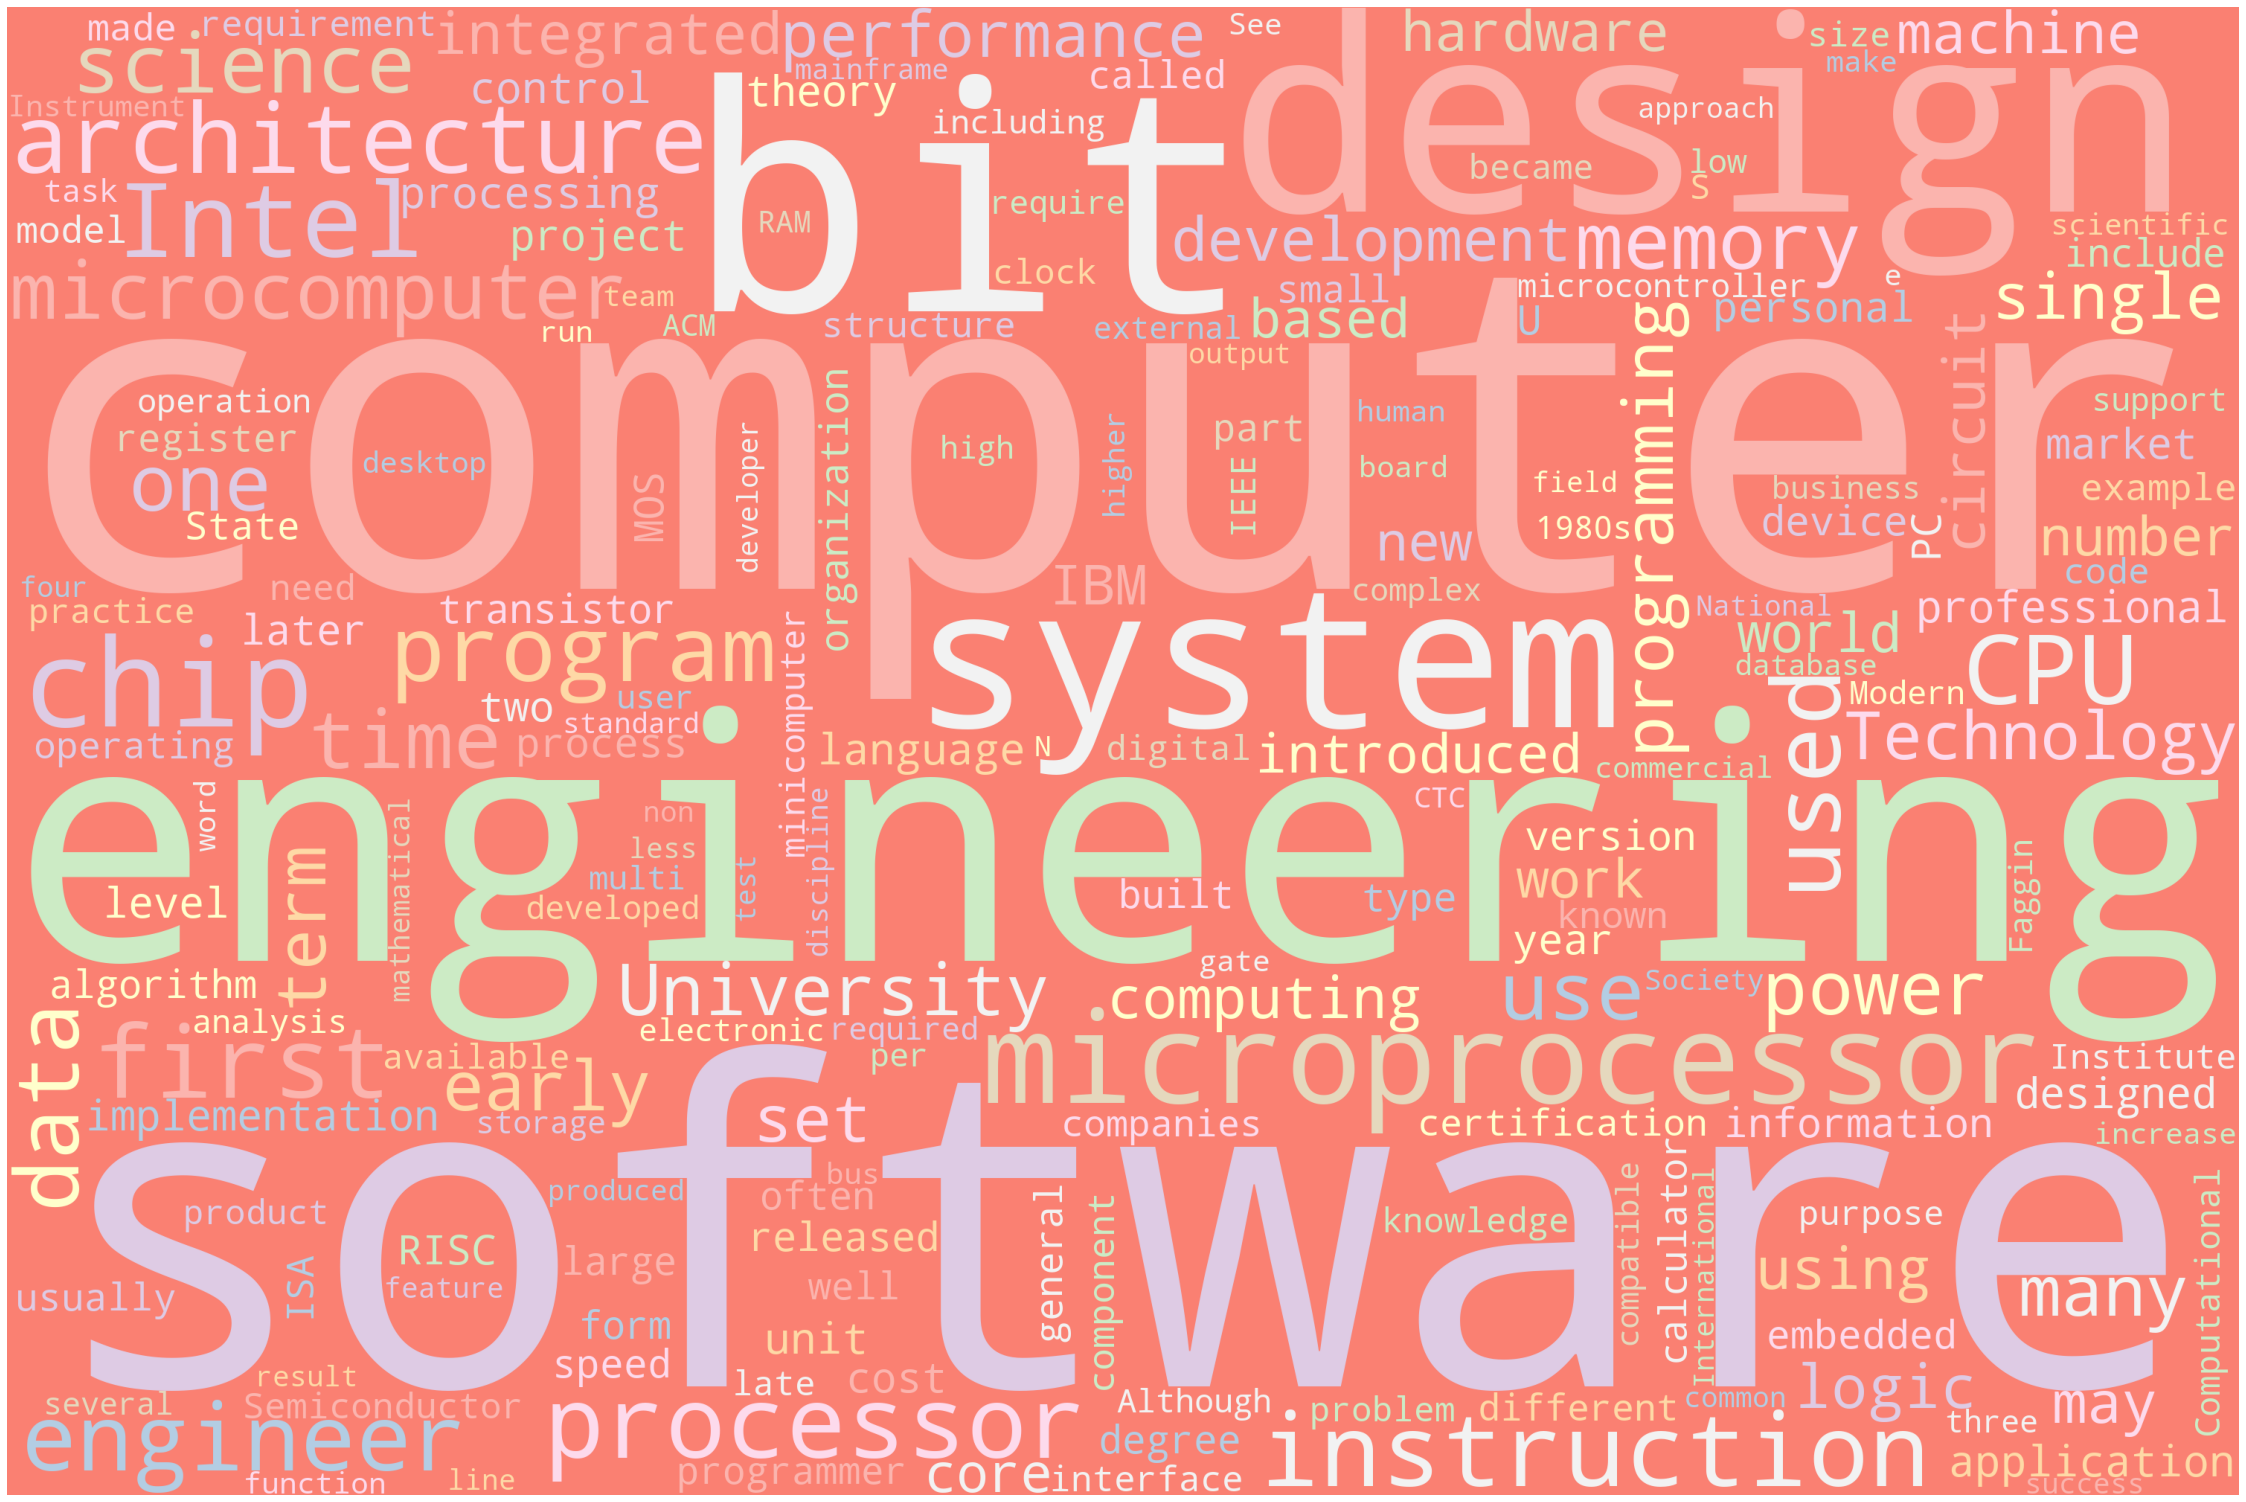

topic =  horsepower in Car
TITLES= ['List of production cars by power output', 'Horsepower']
-------------------------
List of production cars by power output
https://en.wikipedia.org/wiki/List_of_production_cars_by_power_output
[]
-------------------------
Horsepower
https://en.wikipedia.org/wiki/Horsepower
[]
topic =  weight in Car
TITLES= ['Vehicle weight', 'Weight']
-------------------------
Vehicle weight
https://en.wikipedia.org/wiki/Vehicle_weight
[]
-------------------------
Weight
https://en.wikipedia.org/wiki/Weight
[]


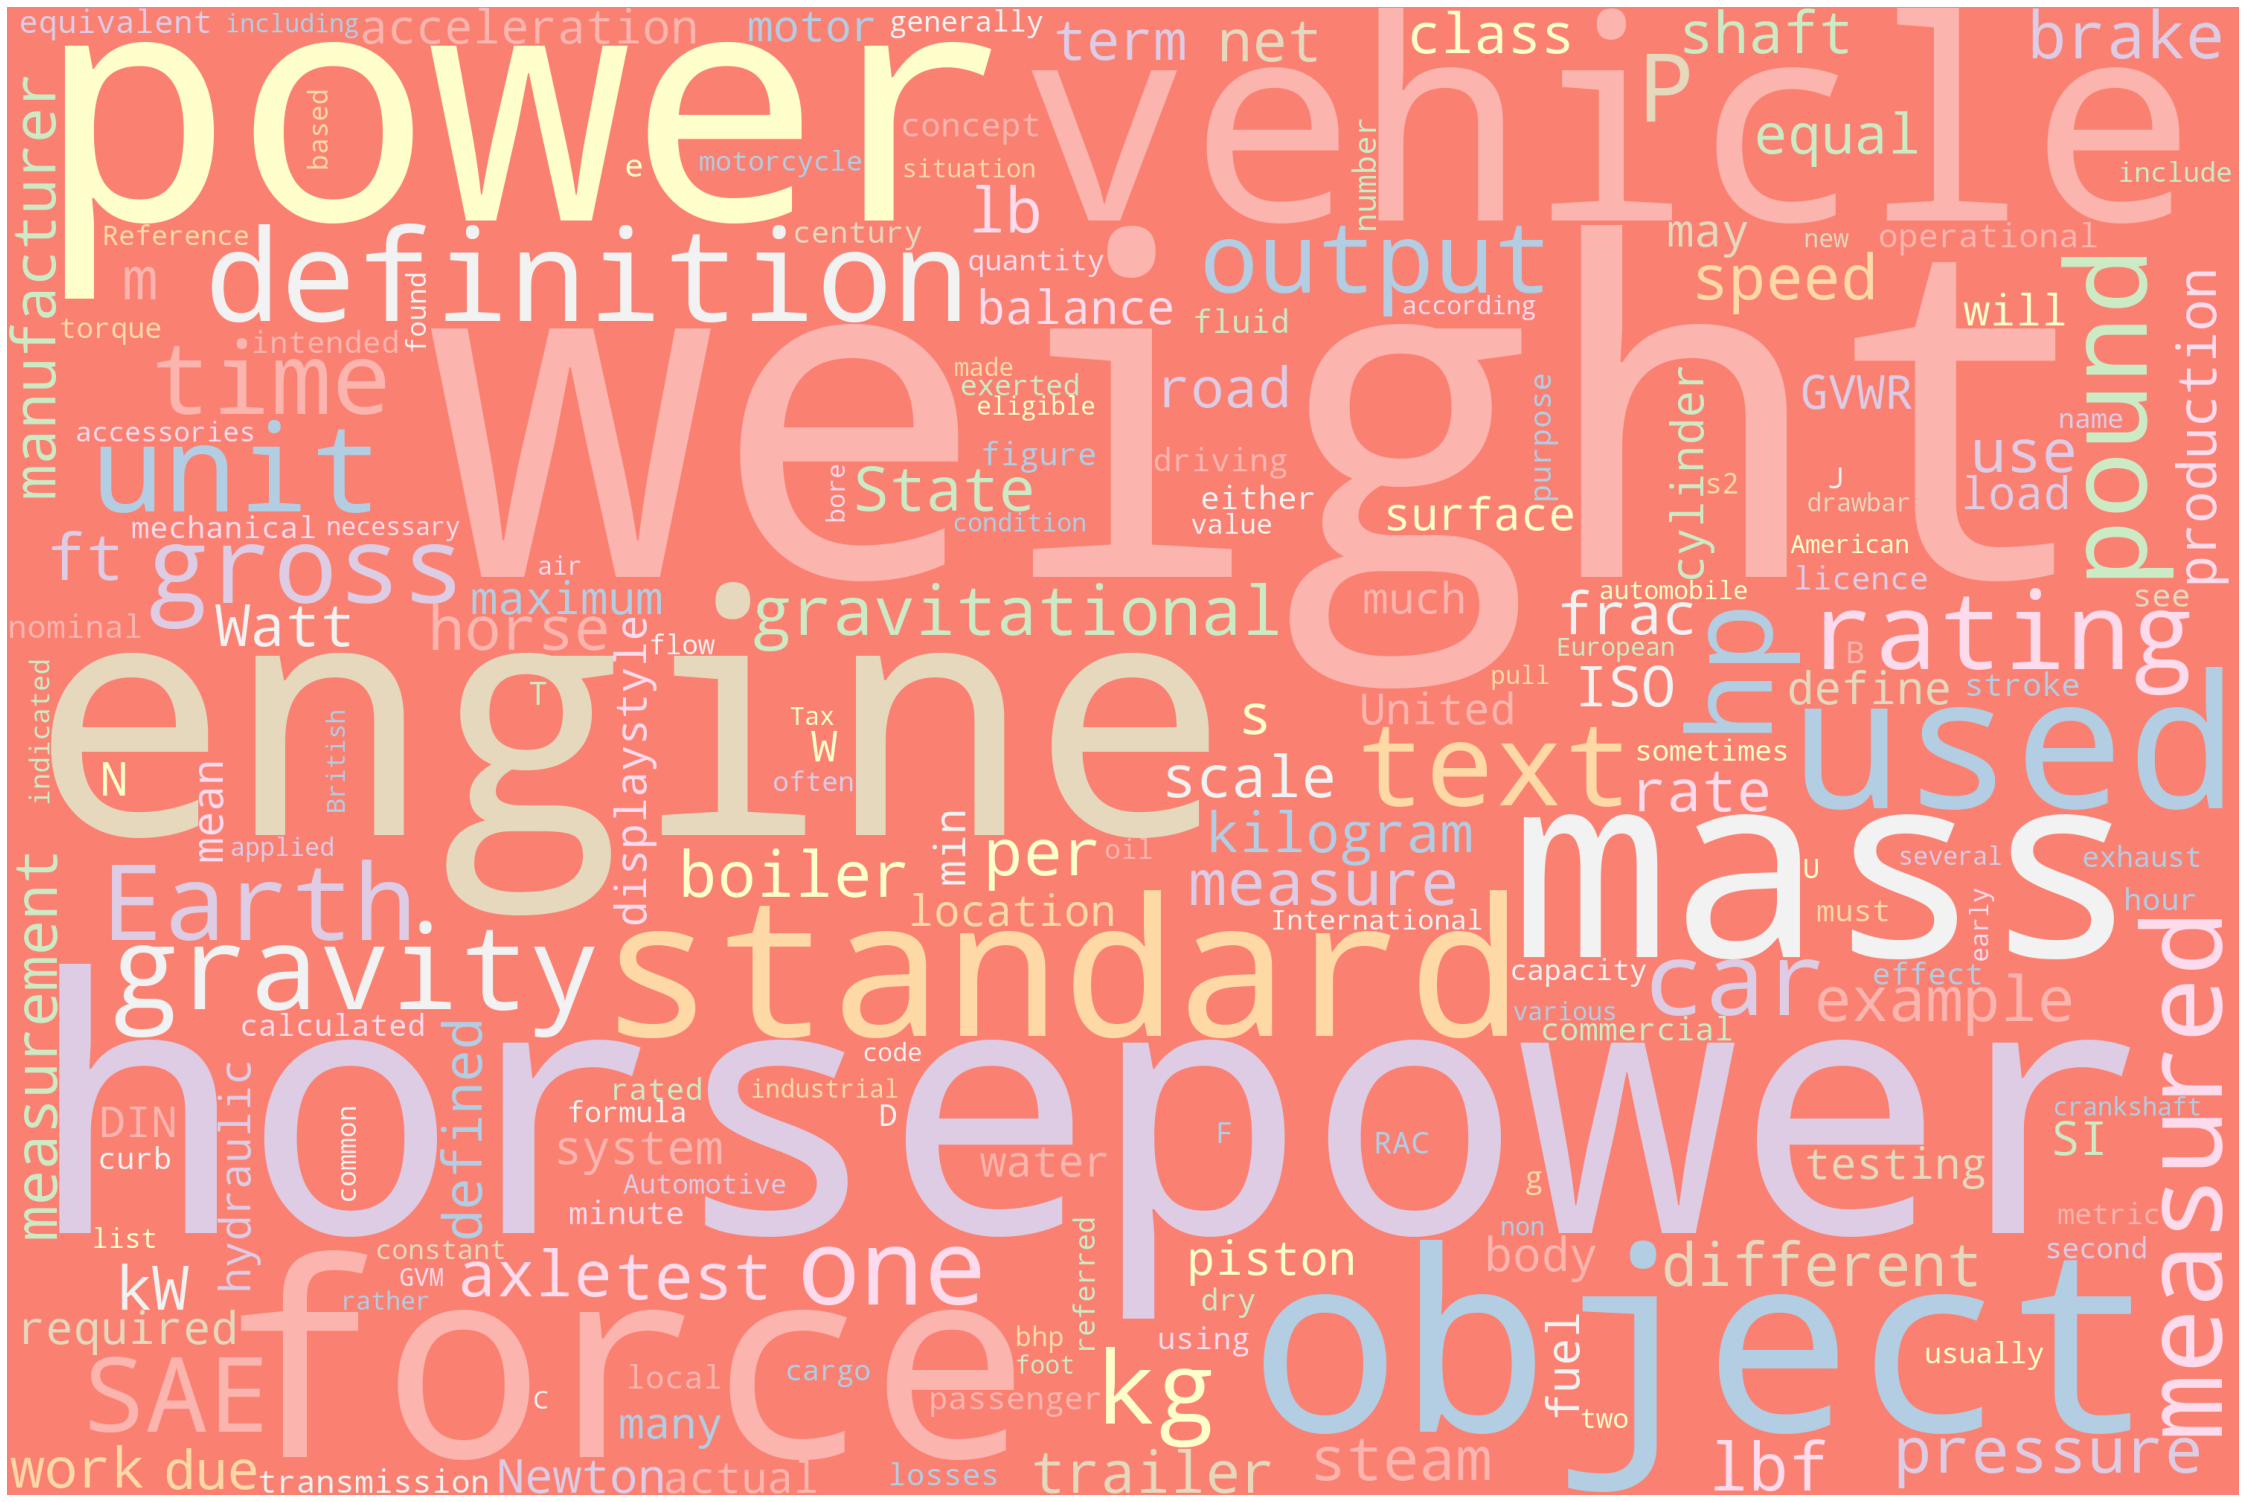

topic =  shoes in Nike
TITLES= ['Nike, Inc.', 'Air Force (shoe)']
-------------------------
Nike, Inc.
https://en.wikipedia.org/wiki/Nike,_Inc.
[]
-------------------------
Air Force (shoe)
https://en.wikipedia.org/wiki/Air_Force_(shoe)
[]
topic =  basketball in Nike
TITLES= ['Nike, Inc.', 'Nike Elite Youth Basketball League']
-------------------------
Nike, Inc.
https://en.wikipedia.org/wiki/Nike,_Inc.
[]
-------------------------
Nike Elite Youth Basketball League
https://en.wikipedia.org/wiki/Nike_Elite_Youth_Basketball_League
[]


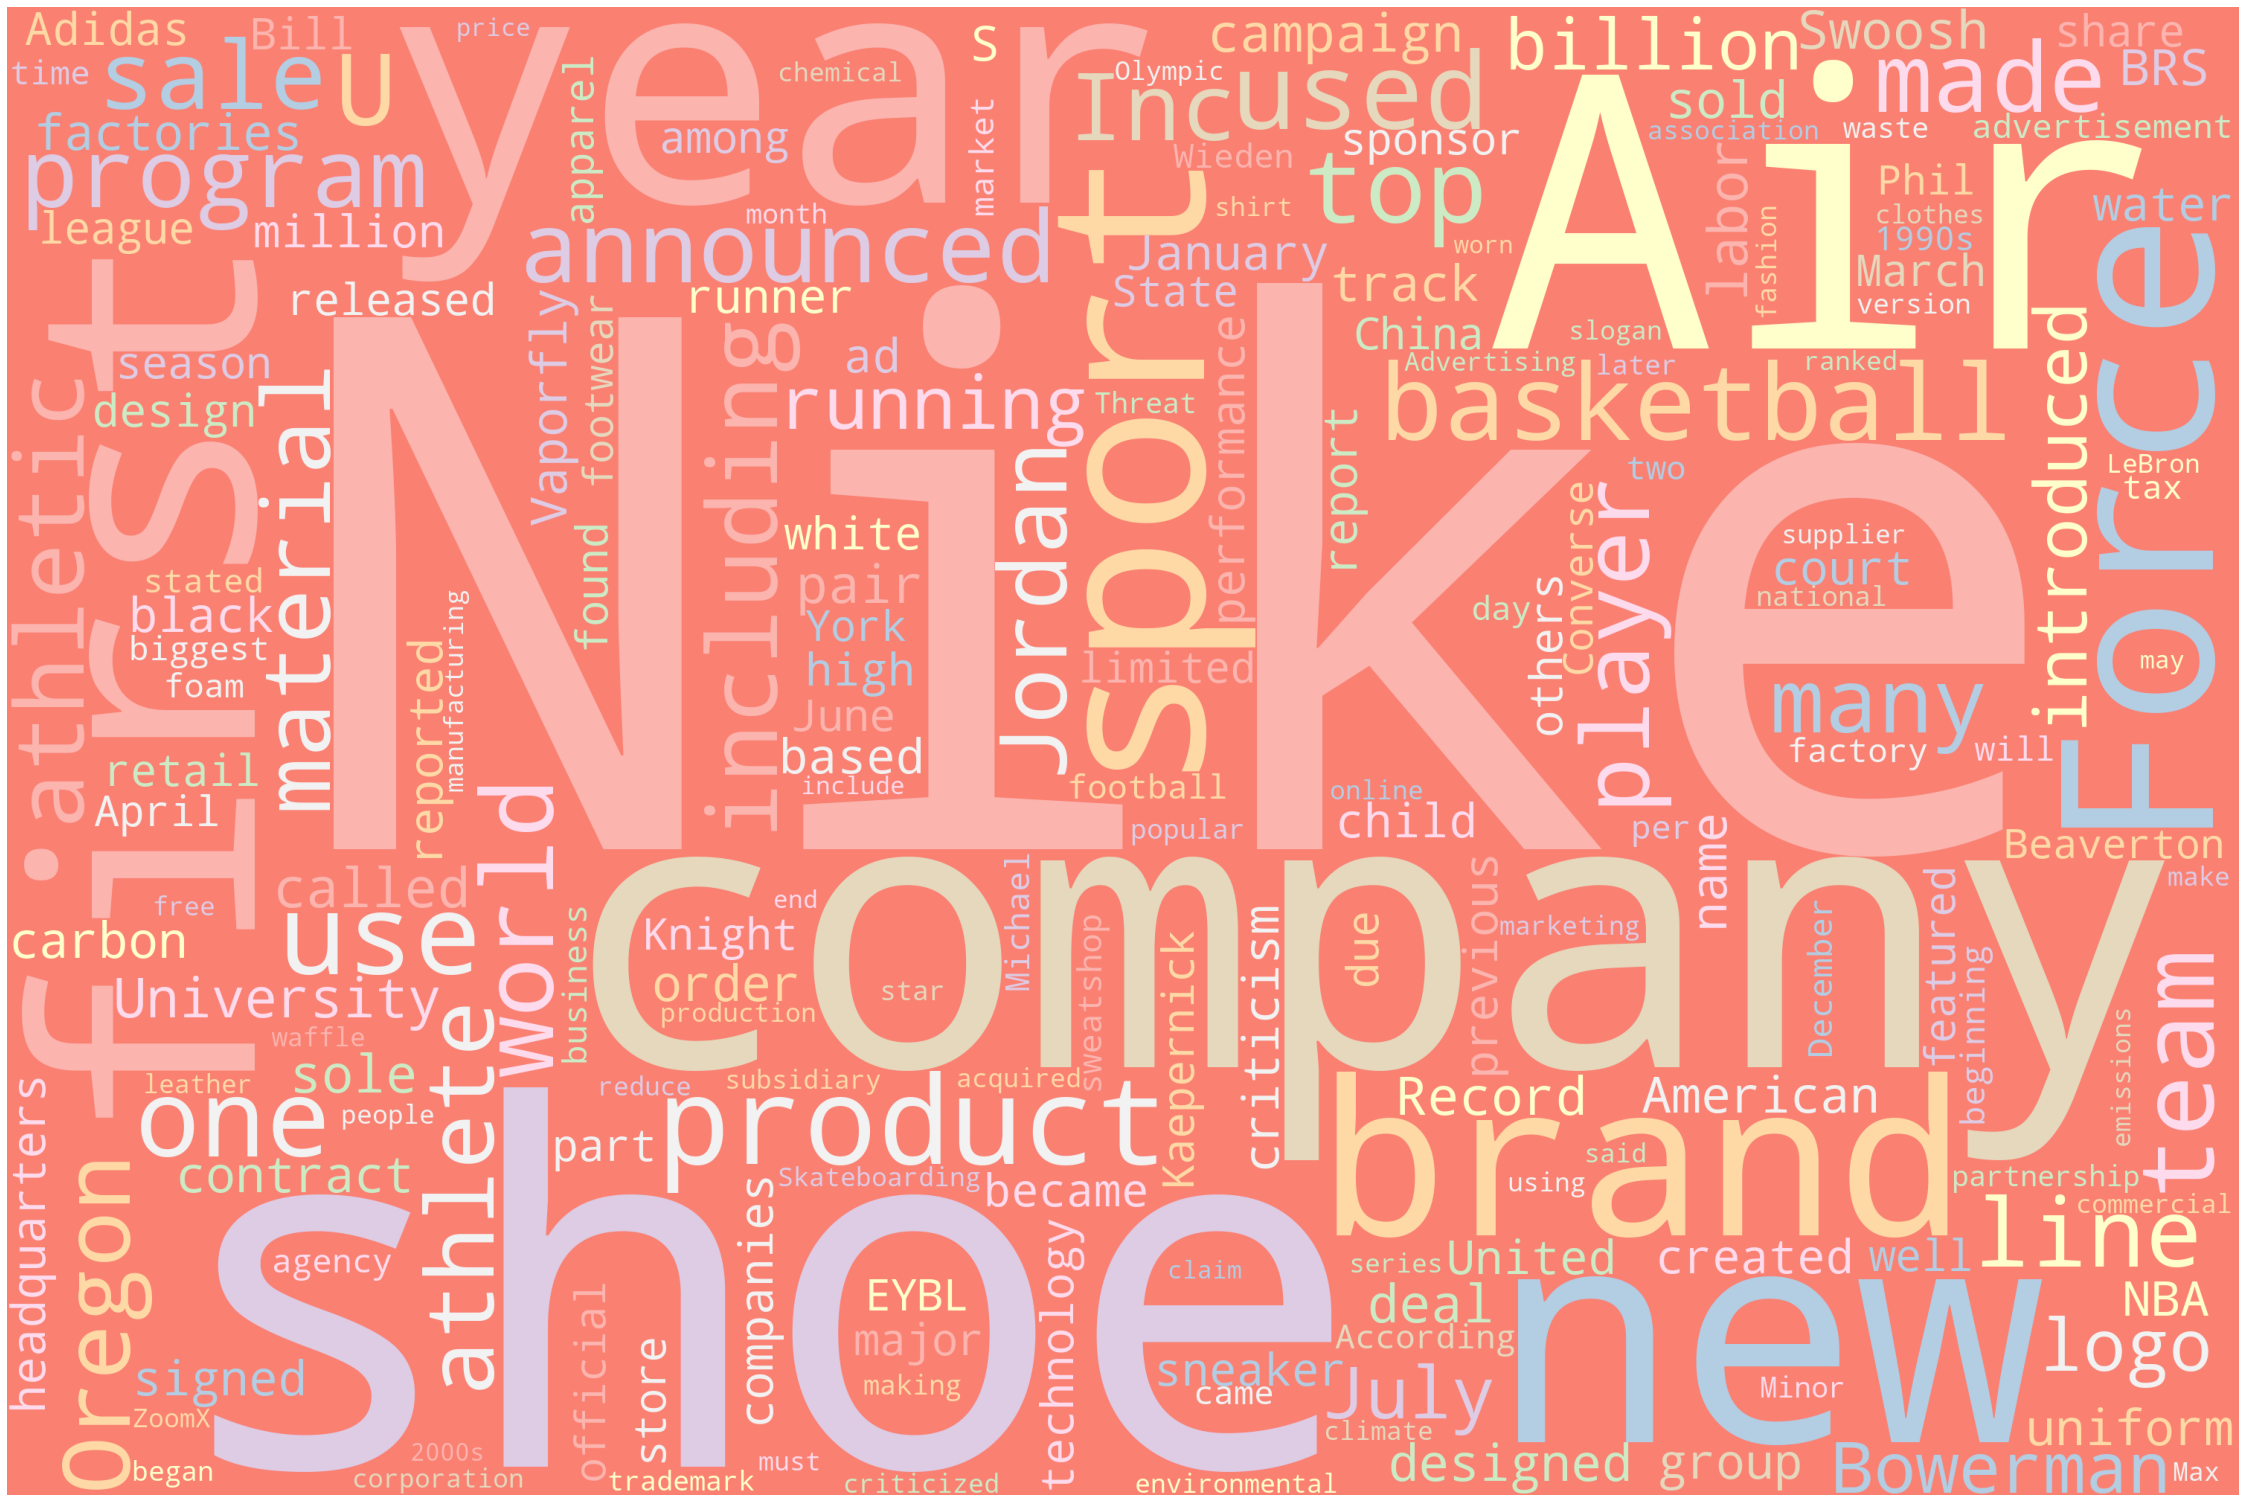

In [12]:
if __name__ == "__main__":
    list1=['computer science']
    list2=['Car']
    list3=['Nike']
    topic_list = ['System Architecture', 'Microprocessor', 'Software Engineering']
    topic_list2 = ['horsepower', 'weight']
    topic_list3 = ['shoes', 'basketball']
    wordcloudGen(list1, topic_list)
    wordcloudGen(list2, topic_list2)
    wordcloudGen(list3, topic_list3)
    